In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df=pd.read_csv('housing.csv')

In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
df=df.dropna()

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

numeric_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


In [ ]:
numeric_df.keys()


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
corr_matrix=numeric_df.corr()


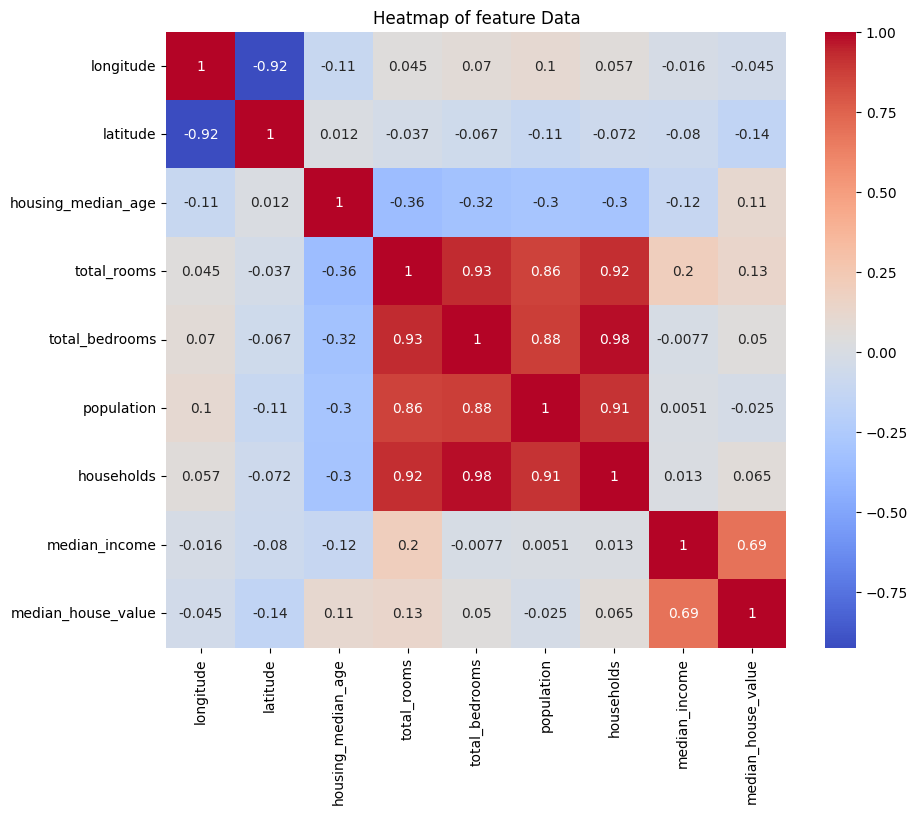

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of feature Data')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(numeric_df[['total_rooms',
       'total_bedrooms', 'population', 'households']])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
pca_data=pca.fit_transform(scaled_data)

pca_data

array([[-1.86250991, -0.09937615, -0.10046784],
       [ 2.96729335, -0.70981671, -0.30274867],
       [-1.51310004, -0.14252671, -0.20313225],
       ...,
       [-0.41860007, -0.18224722,  0.0642384 ],
       [-0.82577049, -0.22940051,  0.06079862],
       [ 0.15218181, -0.11962244,  0.07459866]])

In [ ]:
pca.explained_variance_

array([3.73703  , 0.1556089, 0.0907235])

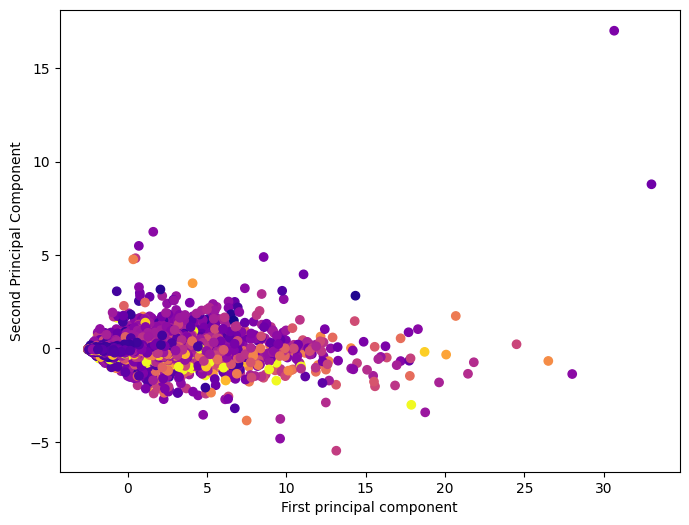

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=numeric_df['median_house_value'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()